# IMPORTS

In [1]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = '-Jh4Kdz98J1YPBJMtvoi'
import pandas
import re
import numpy
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# FUNCTIONS

In [2]:
def formatIncomeData(dataset):
    # Array for values
    finalArray = []
    years = []
    values = []
    # Append to array if year is sooner than 2010. Iterate over rows and extract tuples.
    for row in dataset.itertuples():
        if (row[0].year > 2010):
            finalArray.append(int(row[1]))
    myarray = numpy.asarray(finalArray)
    return(myarray)

def incomeGraph(dataset):
    # Plot income graph across years 2011-2017
    years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
    pyplot.plot(years, dataset)
    pyplot.show()
    
    print("Mean: " + str(numpy.mean(dataset)))
    print("Standard Deviation" + str(numpy.sqrt(numpy.var(dataset))))

def formatRentalIndex(dataset):
    # Arrays for values
    finalArray = []
    years = []
    values = []
    # Iterate over row in dataset, extracting tuples. Only add to array if July and older than 2018.
    for row in dataset.itertuples():
        if (row[0].month == 7 and row[0].year < 2018):
            finalArray.append(int(row[1]))
    myarray = numpy.asarray(finalArray)
    return(myarray)

def runRegressionAnalysis(rental_index_set, pop_set):
    # Create linear regression model with fit.
    model = LinearRegression().fit(make_polynomial(pop_set), rental_index_set)
    # Construct intervals
    intervals = numpy.linspace(pop_set.min(), pop_set.max(), 7)
    # Construct predictions
    predictions = model.predict(make_polynomial(intervals))
    # Plot on scatter plot with predictions
    pyplot.scatter(pop_set, rental_index_set)
    pyplot.plot(intervals, predictions)
    pyplot.show()
    
def variable_output(rental_index_set, pop_set):
    cov_matrix = numpy.cov(pop_set, rental_index_set)
    #Indicates how two variables are related
    covariance = cov_matrix[0, 1]
    #how well correlated the two datasets are (whether they are related to each other)
    correlation = covariance / (numpy.sqrt( cov_matrix[0, 0] ) * numpy.sqrt( cov_matrix[1, 1] ))
    #estimated slope measures how much the rental index increases or decreases when one more person moves to a city
    slope = covariance / cov_matrix[0, 0]
    coef_determination = numpy.square(correlation)
    return { "covariance": covariance, "correlation": correlation, "slope": slope, "coefficient of determination": coef_determination }

# Citation: April 11th Class Notes: https://nbviewer.jupyter.org/url/mimno.infosci.cornell.edu/info2950/Slides/041119/notes-041119.ipynb
def make_polynomial(x):
    return pandas.DataFrame({"linear": x, "squared": x*x, "cubed": x*x*x})

# DATA

In [3]:
buffalo = quandl.get("ZILLOW/C19552_ZRIAH")
buffaloZillow = formatRentalIndex(buffalo)

albany = quandl.get("ZILLOW/C348_ZRIAH")
albanyZillow = formatRentalIndex(albany)

utica = quandl.get("ZILLOW/C20265_ZRIAHMF")
uticaZillow = formatRentalIndex(utica)

columbus = quandl.get("ZILLOW/C19484_ZRIAH")
columbusZillow = formatRentalIndex(columbus)

dayton = quandl.get("ZILLOW/C19660_ZRIAH")
daytonZillow = formatRentalIndex(dayton)

springfield = quandl.get("ZILLOW/C20297_ZRIAH")
springfieldZillow = formatRentalIndex(springfield)

seattle = quandl.get("ZILLOW/C19491_ZRIAH")
seattleZillow = formatRentalIndex(seattle)

renton = quandl.get("ZILLOW/C19685_ZRIAH")
rentonZillow = formatRentalIndex(renton)

redmond = quandl.get("ZILLOW/C19946_ZRIAH")
redmondZillow = formatRentalIndex(redmond)

charlotte = quandl.get("ZILLOW/C19482_ZRIAH")
charlotteZillow = formatRentalIndex(charlotte)

highpoint = quandl.get("ZILLOW/C19856_ZRIAH")
highpointZillow = formatRentalIndex(highpoint)

burlington = quandl.get("ZILLOW/C20522_ZRIAH")
burlingtonZillow = formatRentalIndex(burlington)

tucson = quandl.get("ZILLOW/C19485_ZRIAH")
tucsonZillow = formatRentalIndex(tucson)

tempe = quandl.get("ZILLOW/C19632_ZRIAH")
tempeZillow = formatRentalIndex(tempe)

buckeye = quandl.get("ZILLOW/C20408_ZRIAH")
buckeyeZillow = formatRentalIndex(buckeye)

# REGRESSIONS

Buffalo FRED Income Rate:
[40441 41957 42367 43520 45362 46192 48314]


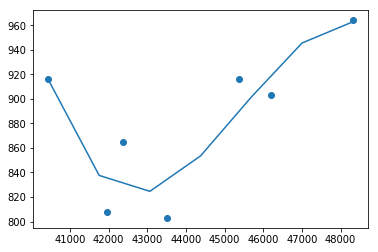

{'covariance': 90320.5238095238, 'correlation': 0.5511417701160928, 'slope': 0.012041511255495995, 'coefficient of determination': 0.30375725076670007}
Income:


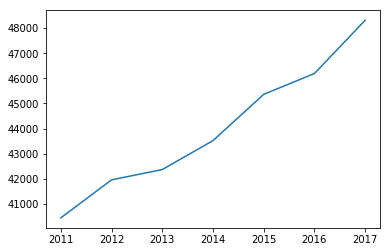

Mean: 44021.857142857145
Standard Deviation2535.5917555908736
Albany FRED Income Rate:


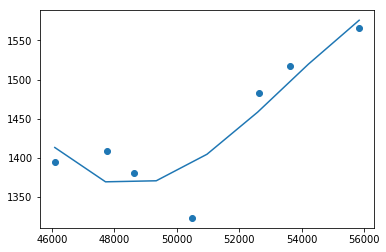

{'covariance': 234835.8333333333, 'correlation': 0.7856609721735524, 'slope': 0.01922914183692549, 'coefficient of determination': 0.6172631631966914}
Income:


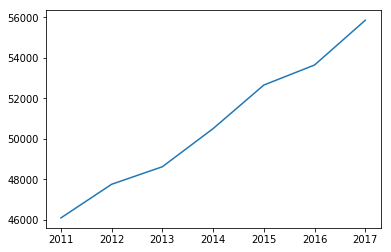

Mean: 50726.857142857145
Standard Deviation3235.4063745012413
Utica FRED Income Rate:


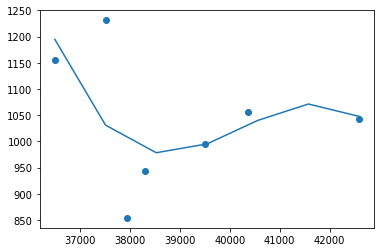

{'covariance': -49484.64285714285, 'correlation': -0.1918495337277235, 'slope': -0.011876787592666692, 'coefficient of determination': 0.03680624359154492}
Income:


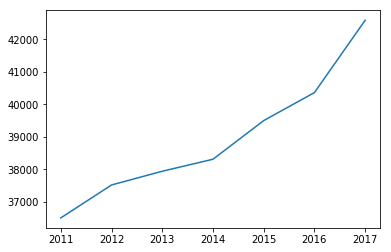

Mean: 38959.57142857143
Standard Deviation1889.78470861047


In [4]:
# NY

# Buffalo
# https://www.quandl.com/data/FRED/BUFF336PCPI-Per-Capita-Personal-Income-in-Buffalo-Niagara-Falls-NY-MSA
# FRED/BUFF336PCPI
print("Buffalo FRED Income Rate:")
buffalo = quandl.get("FRED/BUFF336PCPI")
buffaloIncome = formatIncomeData(buffalo)
print(buffaloIncome)
runRegressionAnalysis(buffaloZillow, buffaloIncome)
print(variable_output(buffaloZillow, buffaloIncome))
print("Income:")
incomeGraph(buffaloIncome)


# Albany
# https://www.quandl.com/data/FRED/ALBA536PCPI-Per-Capita-Personal-Income-in-Albany-Schenectady-Troy-NY-MSA
# FRED/ALBA536PCPI

print("Albany FRED Income Rate:")
albany = quandl.get("FRED/ALBA536PCPI")
albanyIncome = formatIncomeData(albany)
runRegressionAnalysis(albanyZillow, albanyIncome)
print(variable_output(albanyZillow, albanyIncome))
print("Income:")
incomeGraph(albanyIncome)


# Utica
# https://www.quandl.com/data/FRED/UTIC536PCPI-Per-Capita-Personal-Income-in-Utica-Rome-NY-MSA
# FRED/UTIC536PCPI

print("Utica FRED Income Rate:")
utica = quandl.get("FRED/UTIC536PCPI")
uticaIncome = formatIncomeData(utica)
runRegressionAnalysis(uticaZillow, uticaIncome)
print(variable_output(uticaZillow, uticaIncome))
print("Income:")
incomeGraph(uticaIncome)


Columbus FRED Income Rate:


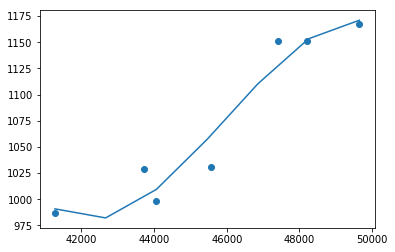

{'covariance': 216090.92857142855, 'correlation': 0.9348809779820537, 'slope': 0.025429587028047318, 'coefficient of determination': 0.8740024429926813}
Income:


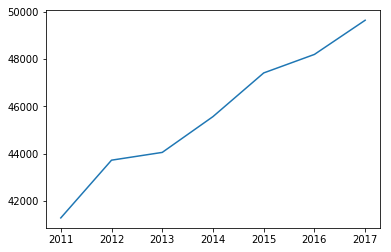

Mean: 45694.142857142855
Standard Deviation2698.8280752192863
Dayton FRED Income Rate:


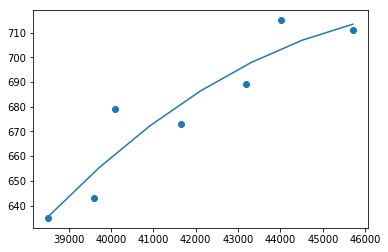

{'covariance': 73801.0, 'correlation': 0.9222942885318783, 'slope': 0.010909038770021067, 'coefficient of determination': 0.8506267546585237}
Income:


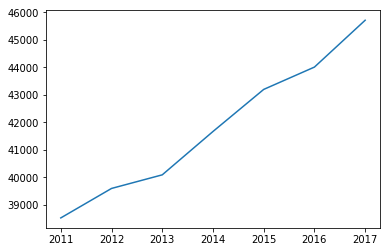

Mean: 41827.0
Standard Deviation2408.044375481007
Springfield FRED Income Rate:


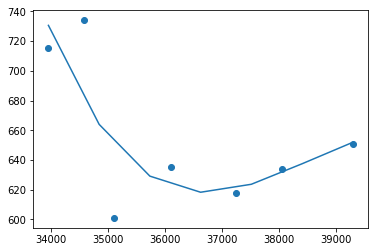

{'covariance': -48666.90476190476, 'correlation': -0.49879527687186587, 'slope': -0.012765011170641598, 'coefficient of determination': 0.24879672822968132}
Income:


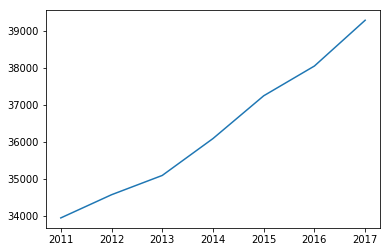

Mean: 36330.142857142855
Standard Deviation1807.7270992343183


In [5]:
# OH

# Columbus
# https://www.quandl.com/data/FRED/COLU139PCPI-Per-Capita-Personal-Income-in-Columbus-OH-MSA
# FRED/COLU139PCPI

print("Columbus FRED Income Rate:")
columbus = quandl.get("FRED/COLU139PCPI")
columbusIncome = formatIncomeData(columbus)
runRegressionAnalysis(columbusZillow, columbusIncome)
print(variable_output(columbusZillow, columbusIncome))
print("Income:")
incomeGraph(columbusIncome)

# Dayton
#  https://www.quandl.com/data/FRED/DAYT339PCPI-Per-Capita-Personal-Income-in-Dayton-OH-MSA
#  FRED/DAYT339PCPI

print("Dayton FRED Income Rate:")
dayton = quandl.get("FRED/DAYT339PCPI")
daytonIncome = formatIncomeData(dayton)
runRegressionAnalysis(daytonZillow, daytonIncome)
print(variable_output(daytonZillow, daytonIncome))
print("Income:")
incomeGraph(daytonIncome)


# Springfield
# https://www.quandl.com/data/FRED/SPRI239PCPI-Per-Capita-Personal-Income-in-Springfield-OH-MSA
# FRED/SPRI239PCPI

print("Springfield FRED Income Rate:")
springfield = quandl.get("FRED/SPRI239PCPI")
springfieldIncome = formatIncomeData(springfield)
runRegressionAnalysis(springfieldZillow, springfieldIncome)
print(variable_output(springfieldZillow, springfieldIncome))
print("Income:")
incomeGraph(springfieldIncome)


Seattle FRED Income Rate:


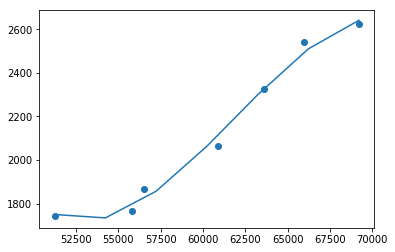

{'covariance': 2245851.738095238, 'correlation': 0.9699355335025379, 'slope': 0.056199284962442426, 'coefficient of determination': 0.9407749391508529}
Income:


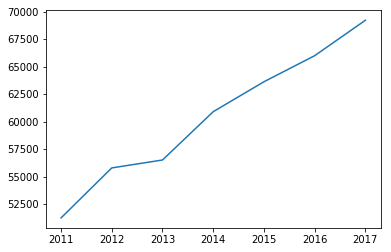

Mean: 60468.142857142855
Standard Deviation5852.639195356263
Renton FRED Income Rate:


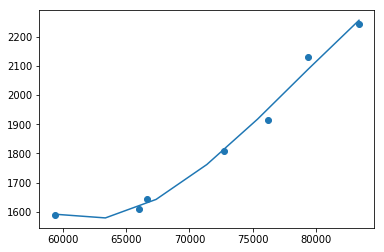

{'covariance': 2104040.833333333, 'correlation': 0.9569410672195989, 'slope': 0.02972615527551453, 'coefficient of determination': 0.915736206131385}
Income:


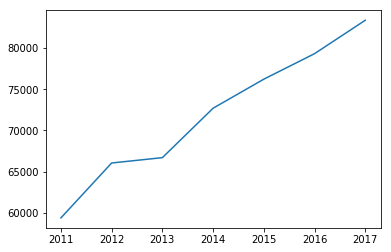

Mean: 71962.0
Standard Deviation7789.046851646411
Redmond FRED Income Rate:


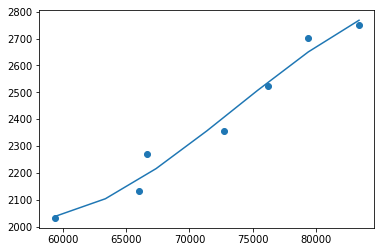

{'covariance': 2269497.1666666665, 'correlation': 0.979982012870049, 'slope': 0.03206374330045414, 'coefficient of determination': 0.960364745548833}
Income:


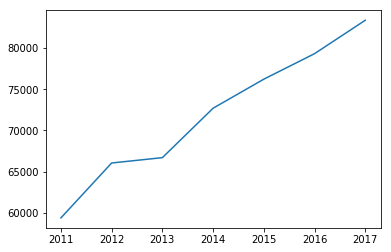

Mean: 71962.0
Standard Deviation7789.046851646411


In [6]:
# WA

# Seattle
# https://www.quandl.com/data/FRED/SEAT653PCPI-Per-Capita-Personal-Income-in-Seattle-Tacoma-Bellevue-WA-MSA
# FRED/SEAT653PCPI

print("Seattle FRED Income Rate:")
seattle = quandl.get("FRED/SEAT653PCPI")
seattleIncome = formatIncomeData(seattle)
runRegressionAnalysis(seattleZillow, seattleIncome)
print(variable_output(seattleZillow, seattleIncome))
print("Income:")
incomeGraph(seattleIncome)




# Renton
# https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data?keyword=king%20county%2C%20wa%20personal%20income
#  FRED/PCPI53033

print("Renton FRED Income Rate:")
renton = quandl.get("FRED/PCPI53033")
rentonIncome = formatIncomeData(renton)
runRegressionAnalysis(rentonZillow, rentonIncome)
print(variable_output(rentonZillow, rentonIncome))
print("Income:")
incomeGraph(rentonIncome)


# Redmond
# Same as above

print("Redmond FRED Income Rate:")
redmond = quandl.get("FRED/PCPI53033")
redmondIncome = formatIncomeData(redmond)
runRegressionAnalysis(redmondZillow, redmondIncome)
print(variable_output(redmondZillow, redmondIncome))
print("Income:")
incomeGraph(redmondIncome)

Charlotte FRED Income Rate:


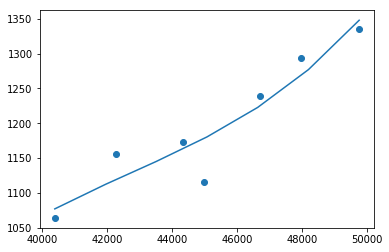

{'covariance': 293984.80952380947, 'correlation': 0.9294902312839278, 'slope': 0.02791868154860836, 'coefficient of determination': 0.8639520900522496}
Income:


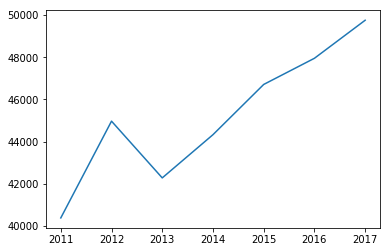

Mean: 45198.857142857145
Standard Deviation3004.2882412868935
Highpoint FRED Income Rate:


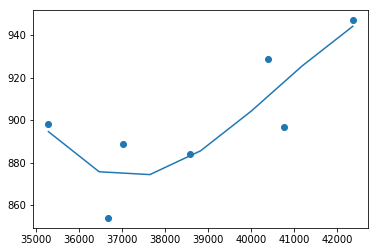

{'covariance': 55925.952380952374, 'correlation': 0.7197522049506979, 'slope': 0.00857667467707417, 'coefficient of determination': 0.5180432365313915}
Income:


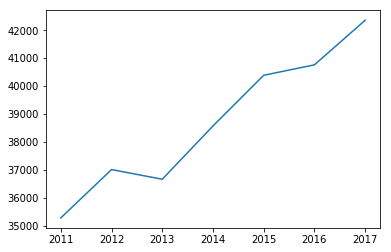

Mean: 38719.857142857145
Standard Deviation2364.1434829898258
Burlington FRED Income Rate:


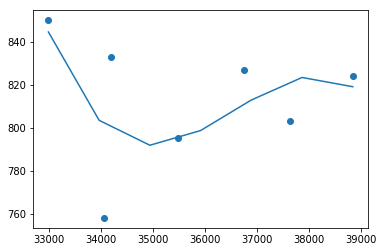

{'covariance': -1068.0238095238117, 'correlation': -0.016557739562427776, 'slope': -0.00023679707069084943, 'coefficient of determination': 0.000274158739417186}
Income:


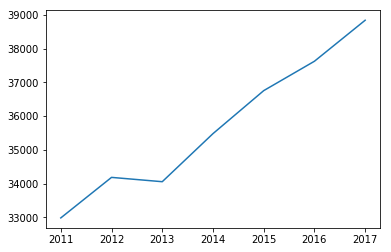

Mean: 35704.857142857145
Standard Deviation1966.205513787656


In [7]:
# NC

# Charlotte
# https://www.quandl.com/data/FRED/CHAR737PCPI-Per-Capita-Personal-Income-in-Charlotte-Gastonia-Rock-Hill-NC-SC-MSA
# FRED/CHAR737PCPI

print("Charlotte FRED Income Rate:")
charlotte = quandl.get("FRED/CHAR737PCPI")
charlotteIncome = formatIncomeData(charlotte)
runRegressionAnalysis(charlotteZillow, charlotteIncome)
print(variable_output(charlotteZillow, charlotteIncome))
print("Income:")
incomeGraph(charlotteIncome)


# Highpoint
# https://www.quandl.com/data/FRED/GREE637PCPI-Per-Capita-Personal-Income-in-Greensboro-High-Point-NC-MSA
# FRED/GREE637PCPI

print("Highpoint FRED Income Rate:")
highpoint = quandl.get("FRED/GREE637PCPI")
highpointIncome = formatIncomeData(highpoint)
runRegressionAnalysis(highpointZillow, highpointIncome)
print(variable_output(highpointZillow, highpointIncome))
print("Income:")
incomeGraph(highpointIncome)


# Burlington
# https://www.quandl.com/data/FRED/BURL537PCPI-Per-Capita-Personal-Income-in-Burlington-NC-MSA
# FRED/BURL537PCPI

print("Burlington FRED Income Rate:")
burlington = quandl.get("FRED/BURL537PCPI")
burlingtonIncome = formatIncomeData(burlington)
runRegressionAnalysis(burlingtonZillow, burlingtonIncome)
print(variable_output(burlingtonZillow, burlingtonIncome))
print("Income:")
incomeGraph(burlingtonIncome)


Tucson FRED Income Rate:


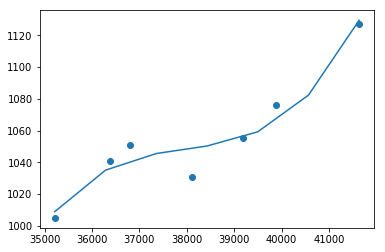

{'covariance': 77557.83333333333, 'correlation': 0.9021897889781171, 'slope': 0.01558963122537335, 'coefficient of determination': 0.8139464153363795}
Income:


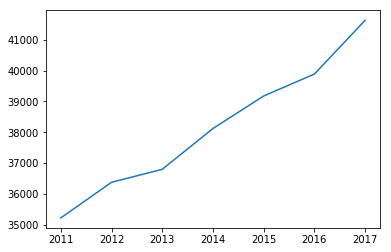

Mean: 38172.0
Standard Deviation2065.006952599849
Tempe FRED Income Rate:


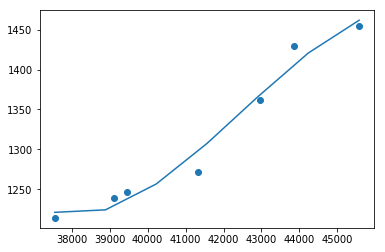

{'covariance': 272622.5, 'correlation': 0.9695423684373965, 'slope': 0.032969799205581296, 'coefficient of determination': 0.9400124041951963}
Income:


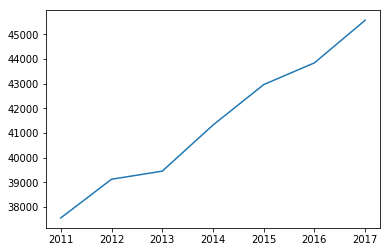

Mean: 41404.0
Standard Deviation2662.2528590865077
Buckeye FRED Income Rate:


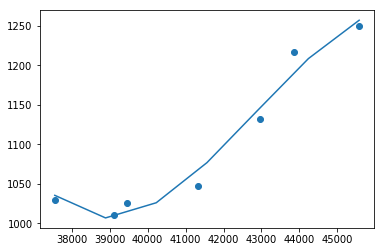

{'covariance': 264094.5, 'correlation': 0.9302895690793774, 'slope': 0.03193845935789742, 'coefficient of determination': 0.8654386823378938}
Income:


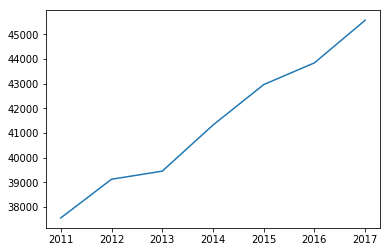

Mean: 41404.0
Standard Deviation2662.2528590865077


In [8]:
# AZ

# Tucson
# https://www.quandl.com/data/FRED/TUCS004PCPI-Per-Capita-Personal-Income-in-Tucson-AZ-MSA
# FRED/TUCS004PCPI

print("Tucson FRED Income Rate:")
tucson = quandl.get("FRED/TUCS004PCPI")
tucsonIncome = formatIncomeData(tucson)
runRegressionAnalysis(tucsonZillow, tucsonIncome)
print(variable_output(tucsonZillow, tucsonIncome))
print("Income:")
incomeGraph(tucsonIncome)


# Tempe
# https://www.quandl.com/data/FRED/PCPI04013-Per-Capita-Personal-Income-in-Maricopa-County-AZ
# FRED/PCPI04013

print("Tempe FRED Income Rate:")
tempe = quandl.get("FRED/PCPI04013")
tempeIncome = formatIncomeData(tempe)
runRegressionAnalysis(tempeZillow, tempeIncome)
print(variable_output(tempeZillow, tempeIncome))
print("Income:")
incomeGraph(tempeIncome)


# Buckeye
# https://www.quandl.com/data/FRED/PCPI04013-Per-Capita-Personal-Income-in-Maricopa-County-AZ
# same as above

print("Buckeye FRED Income Rate:")
buckeye = quandl.get("FRED/PCPI04013")
buckeyeIncome = formatIncomeData(buckeye)
runRegressionAnalysis(buckeyeZillow, buckeyeIncome)
print(variable_output(buckeyeZillow, buckeyeIncome))
print("Income:")
incomeGraph(buckeyeIncome)